# **Download do Modelo & Dependências**

In [15]:
!gdown --id "12daU-EJxfOGNOcdu79NOmBJwXztwvxeH"
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12daU-EJxfOGNOcdu79NOmBJwXztwvxeH
To: /content/vehicle_classifier.keras
100% 13.6M/13.6M [00:00<00:00, 77.0MB/s]


# **Análise de Classificação**

Saving argo.jpeg to argo (2).jpeg


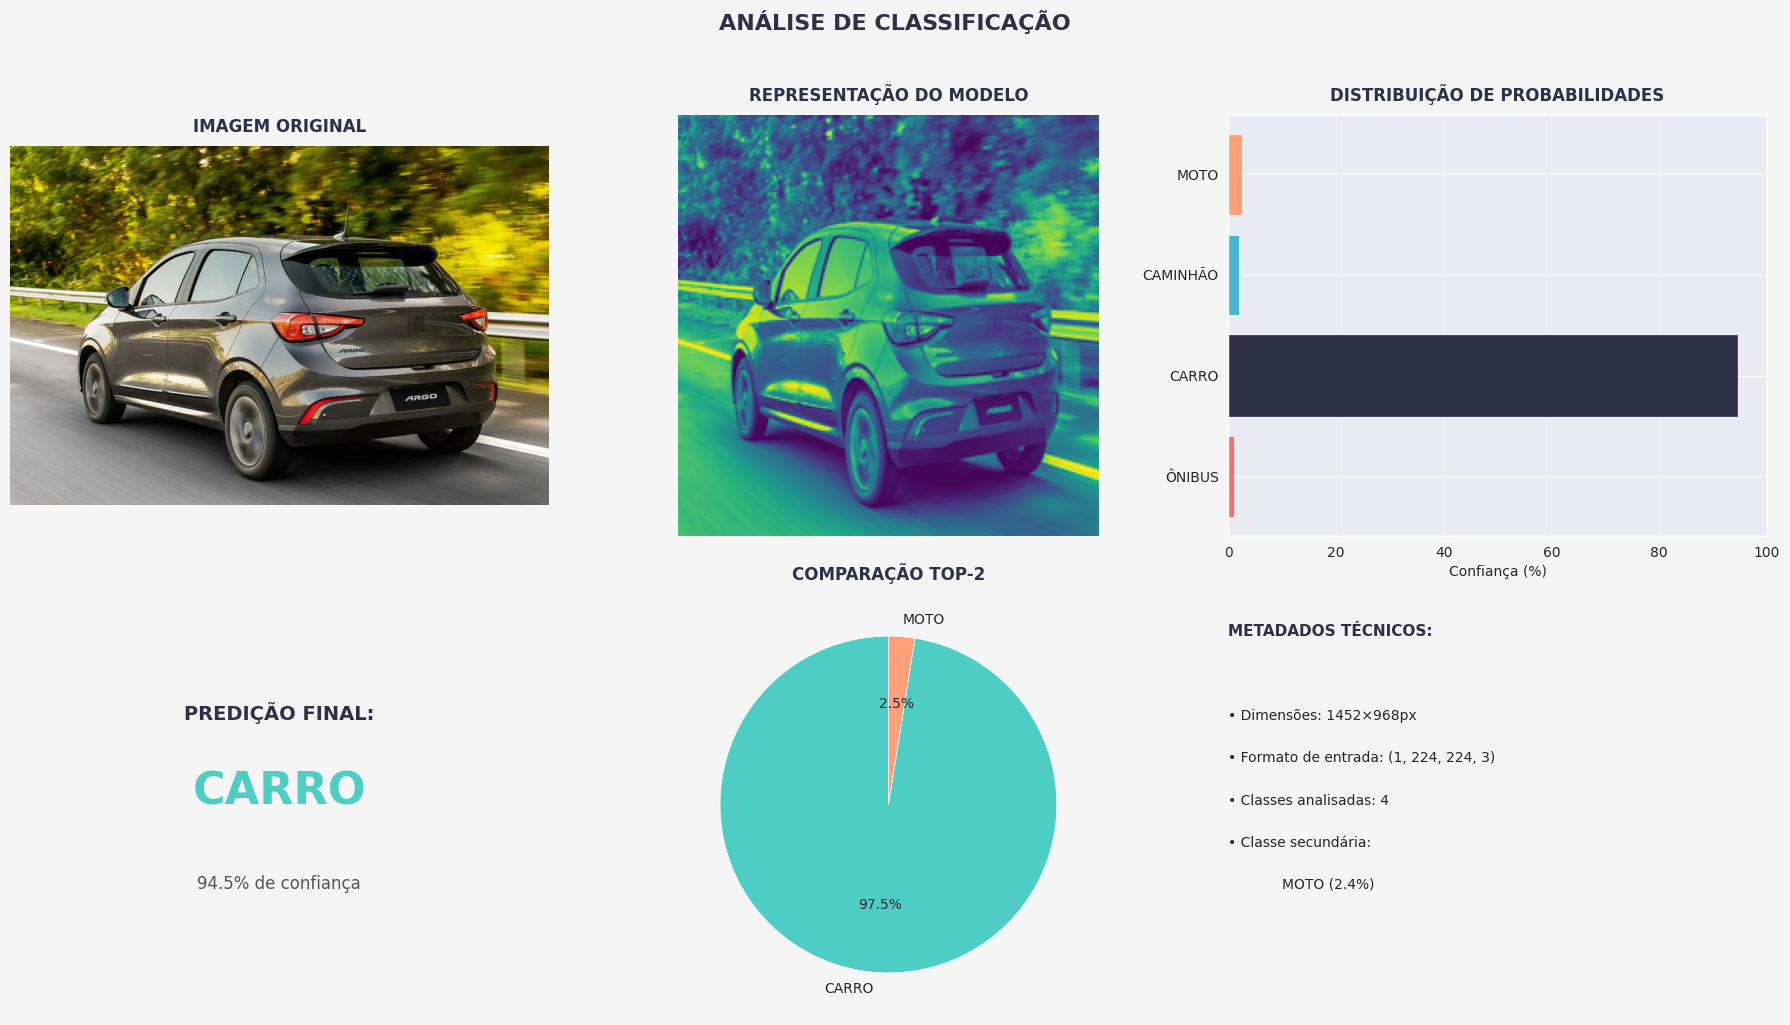


🔍 RELATÓRIO DE CLASSIFICAÇÃO
Arquivo: argo (2).jpeg
Modelo: sequential_8

🏆 RESULTADO:
→ Classe predita: CARRO (94.54%)

📊 DISTRIBUIÇÃO COMPLETA:
1. ÔNIBUS  :  0.99% 
2. CARRO   : 94.54% ⭐
3. CAMINHÃO:  2.02% 
4. MOTO    :  2.45% 


In [16]:
# ========== CONFIGURAÇÃO VISUAL ==========
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#f5f5f5'
COLOR_PALETTE = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A"]
CLASS_NAMES = ['ÔNIBUS', 'CARRO', 'CAMINHÃO', 'MOTO']

# ========== MODELO ==========
try:
    model = keras.models.load_model('vehicle_classifier.keras')
except Exception as e:
    display(HTML("<h3 style='color:red'>❌ Erro ao carregar o modelo</h3>"))
    raise e

# ========== INTERFACE DE UPLOAD ==========
display(HTML("""
<h2 style='color:#ffffff; font-family:Arial; border-bottom:2px solid #4ECDC4'>
🚗 CLASSIFICADOR DE VEÍCULOS
</h2>
<p>Envie uma imagem de ônibus, carro, caminhão ou moto</p>
"""))

uploaded = files.upload()

if not uploaded:
    display(HTML("<p style='color:red'>⚠️ Nenhuma imagem foi enviada</p>"))
else:
    file_name = list(uploaded.keys())[0]

    try:
        # ========== PRÉ-PROCESSAMENTO ==========
        img = Image.open(file_name).convert('RGB')
        img_array = np.array(img.resize((224, 224))) / 255.0
        img_batch = np.expand_dims(img_array, axis=0)

        # ========== PREDIÇÃO ==========
        preds = model.predict(img_batch, verbose=0)[0]
        top_class = np.argmax(preds)

        # ========== VISUALIZAÇÃO ==========
        plt.figure(figsize=(18, 10))
        plt.suptitle("ANÁLISE DE CLASSIFICAÇÃO", fontsize=16, y=1.02,
                    fontweight='bold', color='#2D3047')

        # ---- Painel 1: Imagem Original ----
        plt.subplot(2, 3, 1)
        plt.imshow(img)
        plt.title("IMAGEM ORIGINAL", fontsize=12, pad=10,
                 fontweight='bold', color='#2D3047')
        plt.axis('off')

        # ---- Painel 2: Visualização Técnica ----
        plt.subplot(2, 3, 2)
        gray_img = cv2.cvtColor(np.array(img.resize((224, 224))), cv2.COLOR_RGB2GRAY)
        plt.imshow(gray_img, cmap='viridis')
        plt.title("REPRESENTAÇÃO DO MODELO", fontsize=12, pad=10,
                fontweight='bold', color='#2D3047')
        plt.axis('off')

        # ---- Painel 3: Gráfico de Probabilidades ----
        plt.subplot(2, 3, 3)
        bars = plt.barh(CLASS_NAMES, preds*100, color=COLOR_PALETTE)
        bars[top_class].set_color('#2D3047')
        plt.xlim(0, 100)
        plt.xlabel('Confiança (%)', fontsize=10)
        plt.grid(axis='x', alpha=0.3)
        plt.title("DISTRIBUIÇÃO DE PROBABILIDADES", fontsize=12, pad=10,
                fontweight='bold', color='#2D3047')

        # ---- Painel 4: Resultado Principal ----
        plt.subplot(2, 3, 4)
        plt.text(0.5, 0.7, "PREDIÇÃO FINAL:", ha='center',
               fontsize=14, fontweight='bold', color='#2D3047')
        plt.text(0.5, 0.5, CLASS_NAMES[top_class], ha='center',
               fontsize=32, color=COLOR_PALETTE[top_class], fontweight='bold')
        plt.text(0.5, 0.3, f"{preds[top_class]*100:.1f}% de confiança",
               ha='center', fontsize=12, color='#555555')
        plt.axis('off')

        # ---- Painel 5: Comparação Top-2 ----
        plt.subplot(2, 3, 5)
        sorted_indices = np.argsort(preds)[::-1][:2]
        plt.pie([preds[i] for i in sorted_indices],
               labels=[CLASS_NAMES[i] for i in sorted_indices],
               colors=[COLOR_PALETTE[i] for i in sorted_indices],
               autopct='%1.1f%%', startangle=90)
        plt.title("COMPARAÇÃO TOP-2", fontsize=12, pad=10,
                fontweight='bold', color='#2D3047')

        # ---- Painel 6: Metadados ----
        plt.subplot(2, 3, 6)
        plt.text(0, 0.9, "METADADOS TÉCNICOS:", fontweight='bold',
               fontsize=11, color='#2D3047')
        plt.text(0, 0.7, f"• Dimensões: {img.size[0]}×{img.size[1]}px")
        plt.text(0, 0.6, f"• Formato de entrada: {img_batch.shape}")
        plt.text(0, 0.5, f"• Classes analisadas: {len(CLASS_NAMES)}")
        plt.text(0, 0.4, f"• Classe secundária:")
        plt.text(0.1, 0.3, f"{CLASS_NAMES[sorted_indices[1]]} ({preds[sorted_indices[1]]*100:.1f}%)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # ========== SAÍDA NO CONSOLE ==========
        print("\n🔍 RELATÓRIO DE CLASSIFICAÇÃO")
        print("="*50)
        print(f"Arquivo: {file_name}")
        print(f"Modelo: {model.name}")
        print("\n🏆 RESULTADO:")
        print(f"→ Classe predita: {CLASS_NAMES[top_class]} ({preds[top_class]*100:.2f}%)")
        print("\n📊 DISTRIBUIÇÃO COMPLETA:")
        for i, (name, prob) in enumerate(zip(CLASS_NAMES, preds)):
            print(f"{i+1}. {name.ljust(8)}: {prob*100:5.2f}% {'⭐' if i == top_class else ''}")

    except Exception as e:
        display(HTML(f"<p style='color:red'>❌ ERRO: {str(e)}</p>"))